In [1]:
# Importing modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Read data into data
data = pd.read_csv('./data/NewsArticles.csv', encoding="ISO-8859-1")

# Print head
data.head(3)

,article_id,publish_date,article_source_link,title,subtitle,text,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143
0,1,2017/2/7,http://abcnews.go.com/Politics/pence-break-tie...,"Betsy DeVos Confirmed as Education Secretary, ...",NaN,Michigan billionaire education activist Betsy ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017/2/7,http://abcnews.go.com/Politics/wireStory/melan...,Melania Trump Says White House Could Mean Mill...,NaN,First lady Melania Trump has said little about...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017/2/7,http://abcnews.go.com/Politics/wireStory/trump...,"As Trump Fears Fraud, GOP Eliminates Election ...",NaN,A House committee voted on Tuesday to eliminat...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Remove the columns
articles = data[['title', 'text']]
articles.dropna(axis=0, how='any', inplace=True)

# Print out the first rows of articles
articles.head(3)

,title,text
0,"Betsy DeVos Confirmed as Education Secretary, ...",Michigan billionaire education activist Betsy ...
1,Melania Trump Says White House Could Mean Mill...,First lady Melania Trump has said little about...
2,"As Trump Fears Fraud, GOP Eliminates Election ...",A House committee voted on Tuesday to eliminat...


In [3]:
# Load the regular expression library
import re

# Remove punctuation
articles['text_processed'] = \
articles['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
articles['text_processed'] = \
articles['text_processed'].map(lambda x: x.lower())

# Print out the first rows of articles
articles['text_processed'].head(3)

0    michigan billionaire education activist betsy ...
1    first lady melania trump has said little about...
2    a house committee voted on tuesday to eliminat...
Name: text_processed, dtype: object

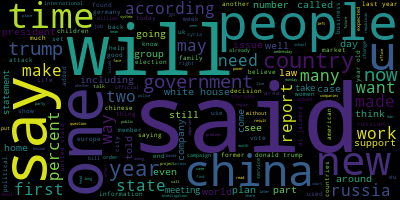

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(articles['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(max_words=1000, contour_width=3)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = articles.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashish/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['michigan', 'billionaire', 'education', 'activist', 'betsy', 'devos', 'confirmed', 'today', 'serve', 'secretary', 'education', 'president', 'trump', 'administration', 'vice', 'president', 'mike', 'pence', 'cast', 'tie', 'breaking', 'vote', 'senate', 'senate', 'voted', 'devos', 'highly', 'contentious', 'nomination', 'afternoon']


In [6]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [7]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"said" + 0.006*"trump" + 0.006*"us" + 0.005*"china" + 0.005*"people" '
  '+ 0.004*"would" + 0.003*"also" + 0.003*"president" + 0.003*"says" + '
  '0.003*"government"'),
 (1,
  '0.008*"said" + 0.006*"china" + 0.005*"us" + 0.005*"also" + 0.004*"new" + '
  '0.004*"one" + 0.004*"year" + 0.003*"says" + 0.003*"chinese" + '
  '0.003*"first"'),
 (2,
  '0.013*"said" + 0.007*"trump" + 0.004*"president" + 0.004*"us" + '
  '0.003*"house" + 0.003*"one" + 0.003*"would" + 0.003*"also" + 0.003*"china" '
  '+ 0.003*"people"'),
 (3,
  '0.010*"said" + 0.006*"trump" + 0.005*"people" + 0.005*"us" + '
  '0.004*"president" + 0.004*"year" + 0.004*"would" + 0.004*"also" + '
  '0.004*"one" + 0.003*"house"'),
 (4,
  '0.012*"said" + 0.006*"us" + 0.004*"people" + 0.004*"trump" + 0.004*"one" + '
  '0.004*"also" + 0.004*"two" + 0.004*"would" + 0.004*"president" + '
  '0.003*"told"'),
 (5,
  '0.010*"said" + 0.005*"trump" + 0.004*"people" + 0.004*"also" + '
  '0.004*"would" + 0.003*"one" + 0.003*"year" +

In [10]:

import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./output/lda_vis_'+str(num_topics))


LDA_vis = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb+') as f:
    pickle.dump(LDA_vis, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDA_vis = pickle.load(f)

pyLDAvis.save_html(LDA_vis, './output/lda_vis_'+ str(num_topics) +'.html')

LDA_vis

/opt/anaconda3/envs/env-TM2020/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.000315 -0.014741       1        1  18.931943
4      0.005173 -0.003894       2        1  10.960611
0     -0.000041  0.000443       3        1  10.758452
7     -0.004285 -0.008668       4        1  10.610813
6      0.009462  0.007357       5        1  10.233634
1     -0.019453  0.007590       6        1   8.441563
2      0.006664 -0.002160       7        1   8.056009
3      0.000617  0.003875       8        1   7.878825
8     -0.005961 -0.000083       9        1   7.854844
5      0.007510  0.010280      10        1   6.273307, topic_info=           Term          Freq         Total Category  logprob  loglift
164       trump   6060.000000   6060.000000  Default  30.0000  30.0000
138        said  14100.000000  14100.000000  Default  29.0000  29.0000
292       house   2301.000000   2301.000000  Default  28.0000  28.0000
577      people   4485.000000   4485.000000  Default  27.0000  27.0000
122   president   3938.000000   3938.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
343         new    155.252763   3653.823219  Topic10  -6.1343  -0.3896
88         like    118.236414   1849.697060  Topic10  -6.4067   0.0188
3423      china    144.644339   4184.296954  Topic10  -6.2051  -0.5959
1121    russian    118.601766   2078.064212  Topic10  -6.4036  -0.0946
122   president    124.602439   3938.963911  Topic10  -6.3542  -0.6847

[876 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
28260      9  0.374105    abidjan
794        1  0.154743  according
794        2  0.145138  according
794        3  0.116324  according
794        4  0.106719  according
...      ...       ...        ...
9516       5  0.502661     yuzhno
30643      2  0.533087       zahr
44586      9  0.685984      zapad
34773      6  0.472943       zuid
46667      9  0.445942       ¹len

[2878 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 1, 8, 7, 2, 3, 4, 9, 6])